# Business Bank D&A
# Data Science Workshop 1: Exploratory Data Analysis & Model Fitting

<img src = "https://miro.medium.com/max/1400/1*RiEfzta7FkYiRq44jhSb7g.png" width = "650" >


## Exploratory Data Analysis:


Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations.

### EDA Steps:

1. Understand the data in context.
2. Asses data types (Numerical vs Categorical, Ordinal vs Nominal etc.).
3. Asses missing data. 
4. Conduct Univariate Analysis (understand distribution, cardinality etc. of each variable).
5. Conduct Bivariate Analysis (understand the relationships between variables and the outcomes).


## California Housing Data Example:

Can we prededict the median value of houses in each suburb based on various features?

##### Prepare Kernel

In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn

In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [157]:
#import data

housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])


### Step 1: Understand the Data in Context

In [122]:
housing.sample(10, random_state = 1)

,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value
4712,-118.11,34.06,2416.0,2.8229,<1H OCEAN,163700
2151,-121.11,37.47,2263.0,NaN,INLAND,145600
15927,-117.87,33.75,5526.0,2.6561,<1H OCEAN,144400
82,-117.77,NaN,3404.0,NaN,<1H OCEAN,500001
8161,-118.34,33.83,1818.0,5.8972,<1H OCEAN,350900
6636,-118.38,34.04,2614.0,3.4063,<1H OCEAN,271600
17333,-118.21,33.91,1073.0,2.7109,<1H OCEAN,133000
19081,-122.22,40.18,3719.0,2.3517,INLAND,88900
13298,-119.02,36.09,2234.0,3.0234,INLAND,88600
7157,-121.54,39.08,2276.0,2.4695,INLAND,58000


In [38]:
housing.shape

(20640, 6)

##### Longtitude:

In [58]:
housing['longitude'].describe()

count    19319.000000
mean      -119.571209
std          2.002335
min       -124.350000
25%       -121.800000
50%       -118.500000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

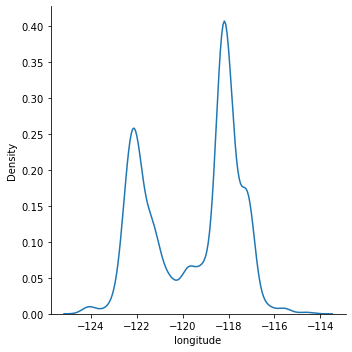

In [59]:
sns.displot(housing['longitude'], kind= 'kde')

##### Latitude

In [10]:
housing['latitude'].describe()

count    20632.000000
mean        35.631108
std          2.136020
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

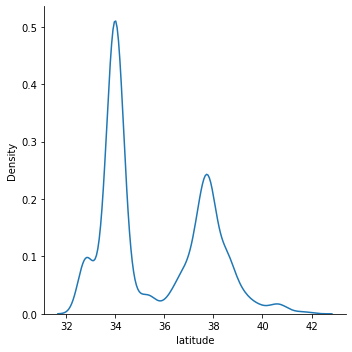

In [11]:
sns.displot(housing['latitude'], kind= 'kde')

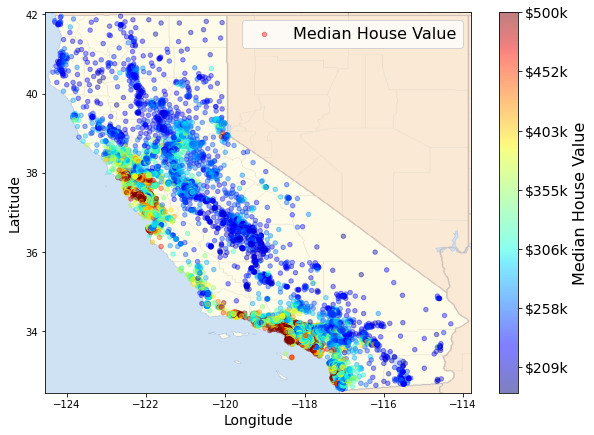

In [12]:
import matplotlib.image as mpimg
california_img=mpimg.imread(r"california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       label = "Median House Value", c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Step 5: Multivaritate Analysis

#### Categorical Variables:

1. Ocean Proximity

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

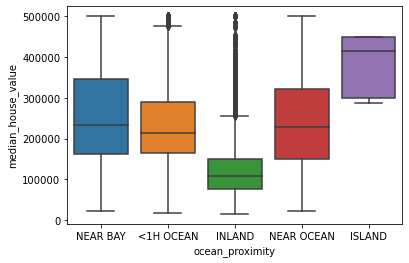

In [23]:
sns.boxplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

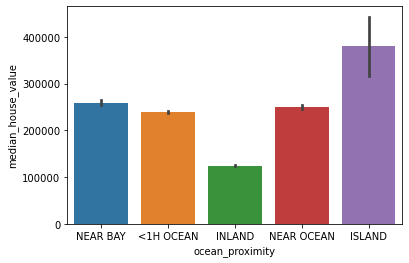

In [24]:
sns.barplot(data = housing, x = 'ocean_proximity', y = 'median_house_value', estimator = np.mean)

##### Numeric Variables

1. Longitude
2. Latitude
3. Total Rooms
4. Median Income

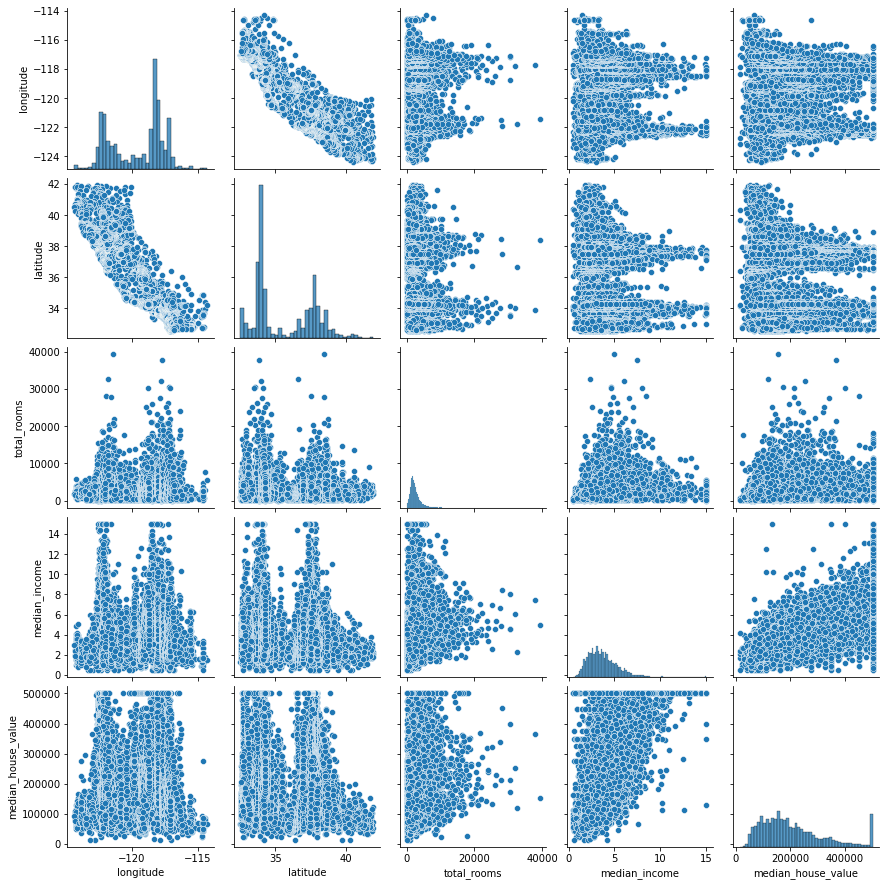

In [25]:
vars = ['longitude', 'latitude', 'total_rooms', 'median_income']

sns.pairplot(data = housing)

<AxesSubplot:>

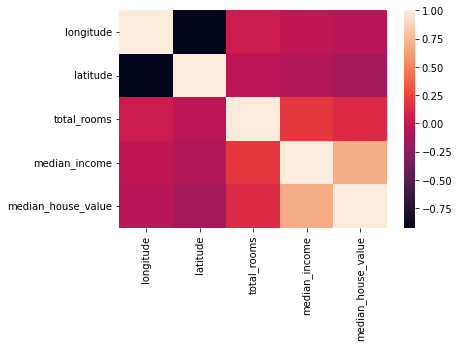

In [26]:
corr = housing.corr()

sns.heatmap(corr)

#### Test Linearity of Numeric Variables:

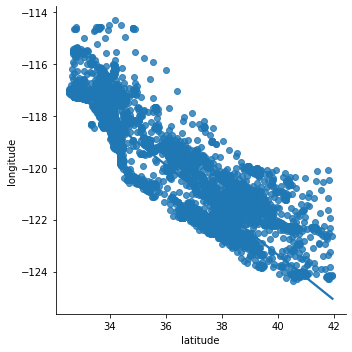

In [27]:
sns.lmplot(x="latitude", y="longitude", data=housing, order=1)


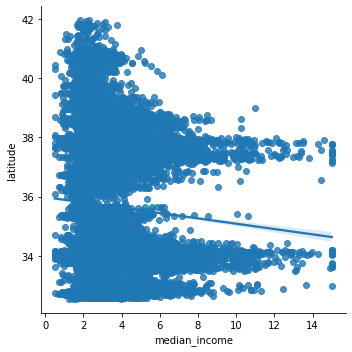

In [28]:
sns.lmplot(x="median_income", y="latitude", data=housing, order=1)


### Key Takeaways:

1. There are no strong linear relationships between features and response varible.
2. Many variables displayed skewed or bimodal distributions. 
3. Rare values are present in the dataset.
4. There are outliers present in the Dataset

All of these observations from the EDA will determine our model delection in the next step of the process. 

### Model Fitting: Decision Tree

#### Decision Trees:

The Decision Tree is a type of machine learning algorithm which is able to learn rules from a dataset in order to infer the result of the target variable.

<img src = "https://bookdown.org/tpinto_home/Beyond-Additivity/tree.png" width = "650" >

### Selecting The Correct Model:

#### Remember the Key Takeaways from The EDA:
<img src = "https://cdn-images-1.medium.com/max/800/1*rbaxTrB_CZCqbty_zv2bEg.png" width = "650" >

<img src = "http://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet.png" width = "650" >


In [158]:
#import ML Libraries

from sklearn.tree import DecisionTreeRegressor, plot_tree  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

#### Data Preparation

In [159]:
#drop missing data
housing.dropna(inplace = True)
housing.reset_index(inplace = True)

#add one hot encoding to categorical variables
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names_out())
housing_for_model = housing.join(df_ohe)
housing_for_model.sample(10)

,index,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
13395,13398,-117.53,34.10,2185.0,3.7917,INLAND,103000,0.0,1.0,0.0,0.0,0.0
15549,15552,-117.08,33.12,1060.0,1.8363,<1H OCEAN,145500,1.0,0.0,0.0,0.0,0.0
1236,1239,-120.27,38.31,3297.0,3.0750,INLAND,108300,0.0,1.0,0.0,0.0,0.0
10042,10045,-121.00,39.23,2809.0,4.0426,INLAND,191700,0.0,1.0,0.0,0.0,0.0
9166,9169,-118.61,34.59,4028.0,4.0579,INLAND,167100,0.0,1.0,0.0,0.0,0.0
15827,15830,-122.43,37.75,2459.0,4.0568,NEAR BAY,387900,0.0,0.0,0.0,1.0,0.0
17604,17611,-121.92,37.29,2189.0,7.6659,<1H OCEAN,426900,1.0,0.0,0.0,0.0,0.0
3127,3130,-117.95,35.08,83.0,4.8750,INLAND,141700,0.0,1.0,0.0,0.0,0.0
15073,15076,-116.99,32.81,4436.0,4.2386,<1H OCEAN,201000,1.0,0.0,0.0,0.0,0.0
17864,17872,-121.96,37.43,2514.0,3.3859,<1H OCEAN,158000,1.0,0.0,0.0,0.0,0.0


#### Model Training

In [164]:
#split data into train and test set:
housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,6:7])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'x0_NEAR BAY','x0_<1H OCEAN','x0_INLAND','x0_NEAR OCEAN','x0_ISLAND']])


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

y_train

,median_house_value
12025,127100
12966,122700
19422,150100
1700,227400
19315,132700
...,...
13123,170100
19648,61500
9845,339100
10799,471400


#### Model Fitting

In [162]:
regressor = DecisionTreeRegressor(random_state=0) 
regressor.fit(x_train, y_train)



DecisionTreeRegressor(random_state=0)

### Model Assesment

In [154]:
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rsq_score = r2_score(y_test, y_pred)

# Print the test score
print('MSE Score: {:2.0}'.format(mse))
print("R Squared Score = {:2.2%}".format(rsq_score)) 

MSE Score: 4e+09
R Squared Score = 67.26%


#### Model Interpretation

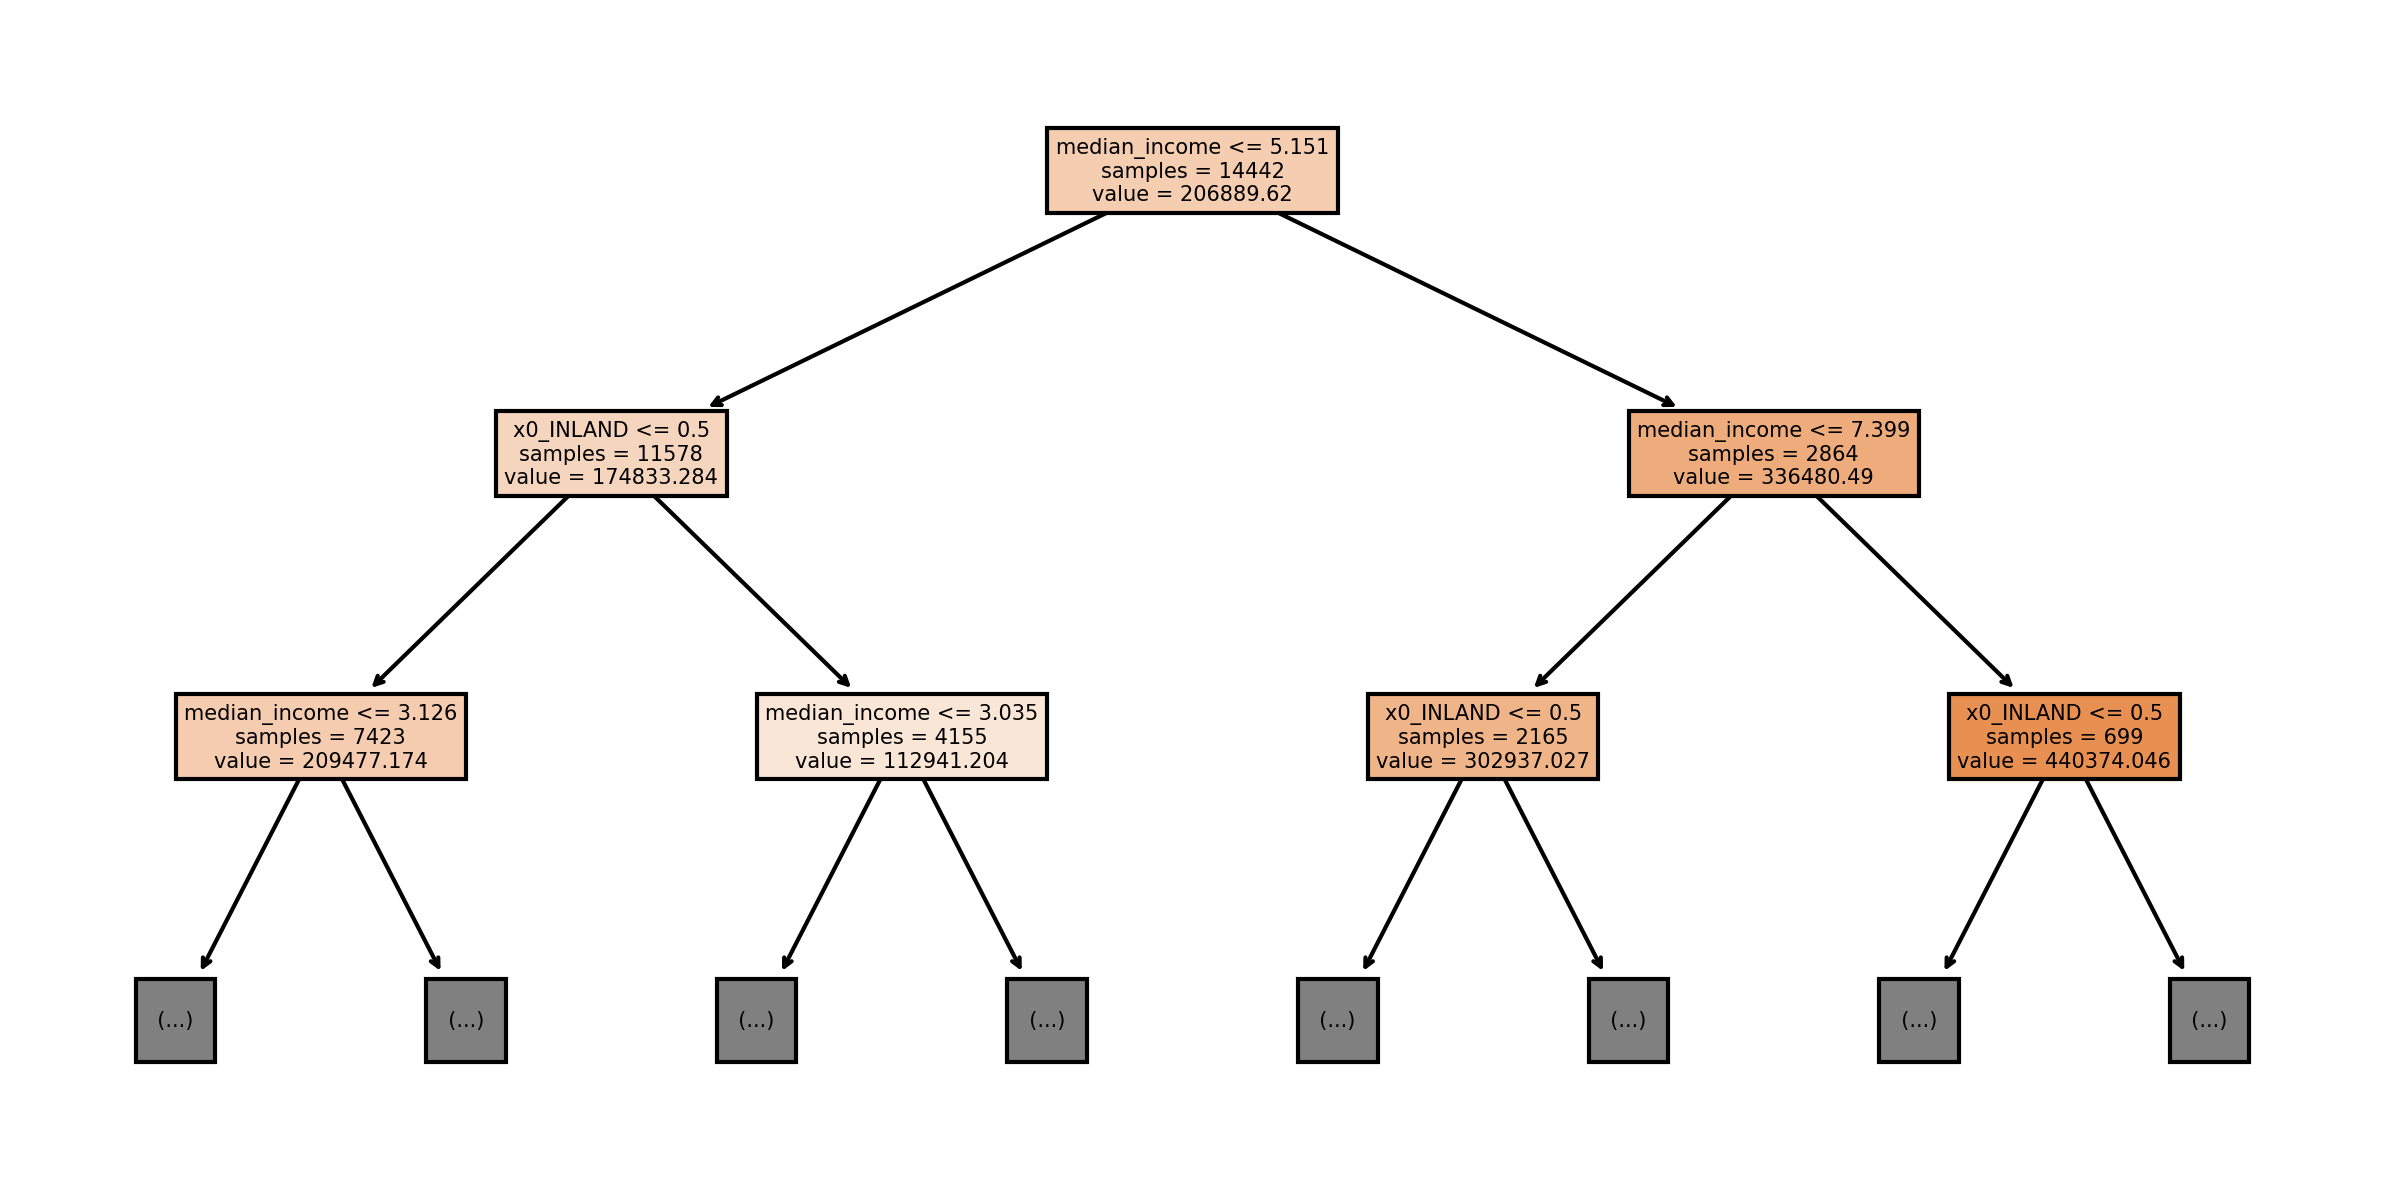

In [155]:
plt.figure(figsize=[10,5], dpi=300)
plot_tree(regressor, max_depth=2, 
          feature_names=x_train.columns,
          impurity=False,
          filled=True)
plt.show()